# **Module**: PCA-based Multivariate Statistical Process Monitoring
## **Lecture**: PCA: Industrial Case Study
### *Topic*:  Dimensionality Reduction

In [41]:
# import required packages
import numpy as np, pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True)

In [42]:
# ==================================================================================
#                        Read and explore dataset
# ==================================================================================

In [43]:
#%% fetch data
data = pd.read_excel('proc1a.xlsx',skiprows=1,usecols='C:AI')

print("\n First few rows:")
print(data.head())


 First few rows:
   x1in  x2in  x3in  x4in  x5in  x6in  x7in    y1    y2    y3  ...  xgnx  \
0  0.47 -1.66 -0.19  1.94  0.07 -4.54 -0.09 -1.13  0.62  0.24  ... -0.13   
1  0.05 -0.83  0.04  0.75  0.25 -0.02 -0.60 -0.89  0.68  0.14  ... -0.17   
2 -0.58 -0.21 -0.08  0.89  0.34  0.12 -0.86 -0.81  0.77  0.12  ...  0.07   
3 -0.90  0.11  0.16  1.43  0.45  0.13 -0.41 -0.70  0.69  0.21  ...  0.17   
4 -0.78 -0.33 -0.34  1.51  0.50 -0.01 -0.31 -0.38  0.91  0.07  ...  0.14   

   xhnx  xinx  xjnx  xknx  xlnx  xmen  xnen  xoen  xpen  
0 -0.12  0.24  0.22 -0.01  0.27 -0.21  0.38  0.09 -0.11  
1 -0.11  0.22  0.05 -0.08  0.18 -0.33  0.34 -0.04 -0.33  
2 -0.17  0.20 -0.02 -0.13  0.31 -0.41  0.22  0.04 -0.01  
3 -0.01  0.29  0.07  0.01  0.30 -0.49  0.30 -0.22  0.00  
4 -0.05  0.26  0.06 -0.04  0.33 -0.58  0.23 -0.27 -0.28  

[5 rows x 33 columns]


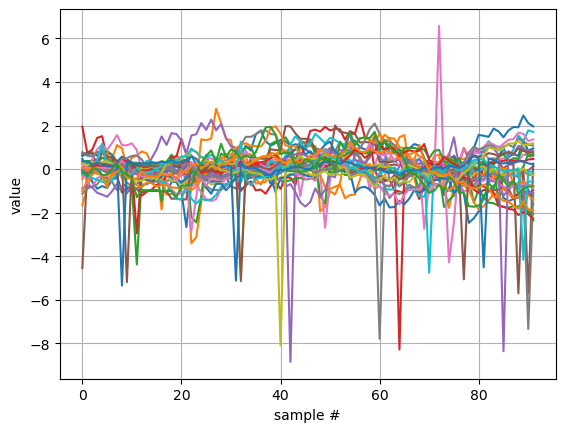

In [44]:
#%% visualize complete data
plt.figure()
plt.plot(data)
plt.ylabel('value'), plt.xlabel('sample #')
plt.grid()

In [45]:
# ==================================================================================
#                        Fit PCA model 
# ==================================================================================

In [46]:
# separate train data
data_train = data.iloc[0:69,]
           
# scale data
scaler = StandardScaler()
data_train_normal = scaler.fit_transform(data_train)
           
# fit PCA (retaining all PCs by default)
pca = PCA()
scores_train = pca.fit_transform(data_train_normal)

print('Shape of scores_train matrix: ', scores_train.shape)

Shape of scores_train matrix:  (69, 33)


##### we have not accomplished any dimensionality reduction yet. PCA has simply provided us an uncorrelated dataset in scores_train. To confirm this, we can compute a heatmap of correlation coefficients among the columns of score_train. 

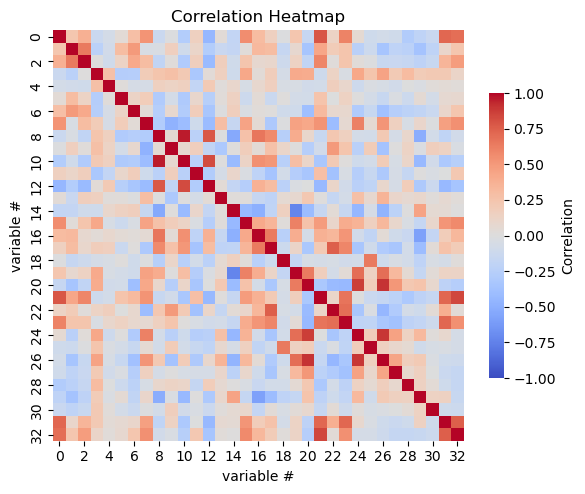

In [47]:
# heatmap of correlation coefficients among original scaled variables
import seaborn as sns

# Calculate correlation matrix
correlation_matrix_originalVariables = np.corrcoef(data_train_normal.T)

# Create heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix_originalVariables, 
            cmap='coolwarm',  # Color scheme (red for positive, blue for negative correlations)
            vmin=-1,  # Minimum correlation value
            vmax=1,   # Maximum correlation value
            center=0, # Center the colormap at 0
            square=True, # Make the plot square-shaped
            cbar_kws={
                'shrink': 0.5,  # height
                'label': 'Correlation',  # add label
            }) # Format correlation values to 2 decimal places

plt.xlabel('variable #'), plt.ylabel('variable #')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

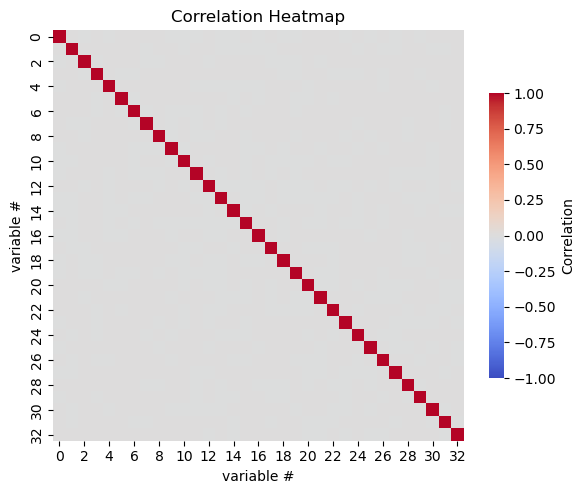

In [48]:
# heatmap of correlation coefficients among transformed variables
correlation_matrix_Scores = np.corrcoef(scores_train.T)

# Create heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix_Scores, 
            cmap='coolwarm',  # Color scheme (red for positive, blue for negative correlations)
            vmin=-1,  # Minimum correlation value
            vmax=1,   # Maximum correlation value
            center=0, # Center the colormap at 0
            square=True, # Make the plot square-shaped
            cbar_kws={
                'shrink': 0.5,  # height
                'label': 'Correlation',  # add label
            }) # Format correlation values to 2 decimal places

plt.xlabel('variable #'), plt.ylabel('variable #')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

##### Let's now see the variances captured by each PC

In [49]:
# get the eigenvalues or the variances of the different PC Scores
variances_captured = pca.explained_variance_
print('variances of the PC scores: ', variances_captured)

variances of the PC scores:  [6.423 5.529 5.218 2.576 1.949 1.655 1.424 1.275 1.03  1.005 0.865 0.839
 0.667 0.618 0.568 0.318 0.259 0.235 0.207 0.172 0.16  0.106 0.087 0.067
 0.051 0.044 0.038 0.032 0.023 0.021 0.015 0.008 0.   ]


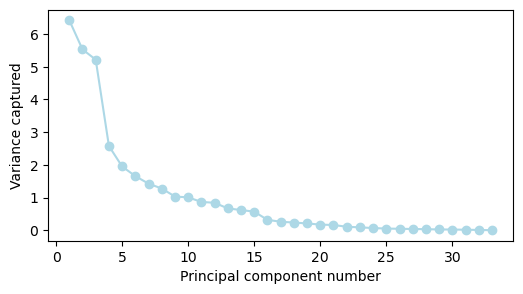

In [50]:
# visualize the variances 
plt.figure(figsize=(6,3))
plt.plot(range(1, len(variances_captured) + 1), variances_captured, color='lightblue', marker='o')
plt.xlabel('Principal component number'), plt.ylabel('Variance captured')
plt.show()

In [51]:
# ==================================================================================
#                   Find number of PCs to retain via CPV plot
# ==================================================================================

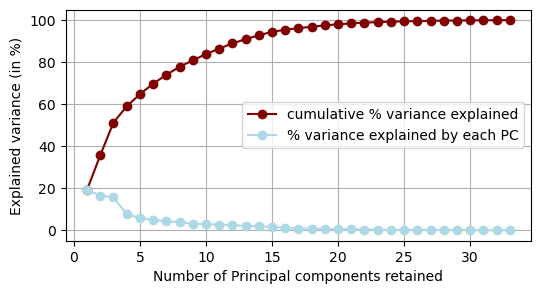

In [52]:
explained_variance = 100*pca.explained_variance_ratio_ # in percentage
cum_explained_variance = np.cumsum(explained_variance) # cumulative % variance explained

plt.figure(figsize=(6,3))
plt.plot(range(1, len(variances_captured) + 1), cum_explained_variance, color='maroon', marker='o', label = 'cumulative % variance explained')
plt.plot(range(1, len(variances_captured) + 1), explained_variance, color='lightblue', marker='o', label = '% variance explained by each PC')
plt.ylabel('Explained variance (in %)')
plt.xlabel('Number of Principal components retained')
plt.legend()
plt.grid()
plt.show()

In [53]:
# decide # of PCs to retain
n_comp = np.argmax(cum_explained_variance >= 90) + 1
print('Number of PCs cumulatively explaining atleast 90% variance: ', n_comp)

Number of PCs cumulatively explaining atleast 90% variance:  13


In [54]:
# ==================================================================================
#                   Perform dimensionality reduction
# ==================================================================================

In [55]:
# compute reduced data in PC space
scores_train_reduced = scores_train[:,0:n_comp]
print('Shape of score matrix: ', scores_train_reduced.shape)

Shape of score matrix:  (69, 13)


In [56]:
# ==================================================================================
#              Refit PCA with reduced number of components
# ==================================================================================

In [57]:
# fit PCA (retaining only n_comp PCs)
pca = PCA(n_components=n_comp)  # retain only n_comp PCs
scores_train_reduced = pca.fit_transform(data_train_normal)

print('Shape of score matrix: ', scores_train_reduced.shape)

Shape of score matrix:  (69, 13)


##### Let's reconstruct the data using the reduced score matrix and visually confirm that only a small amount of data has been discarded or lost.

In [58]:
# ==================================================================================
#                               Reconstruct
# ==================================================================================

In [59]:
data_train_normal_reconstruct = pca.inverse_transform(scores_train_reduced)

print('Shape of reconstructed X (normalized) matrix: ', data_train_normal_reconstruct.shape)

Shape of reconstructed X (normalized) matrix:  (69, 33)


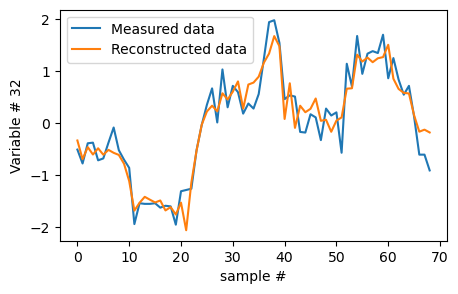

In [60]:
# plot to compare original and reconstructed variables
var = 32
plt.figure(figsize=(5,3))
plt.plot(data_train_normal[:,var],label = 'Measured data')
plt.plot(data_train_normal_reconstruct[:,var],label = 'Reconstructed data')
plt.ylabel('Variable # '+ str(var))
plt.xlabel('sample #')
plt.legend()
plt.show()